In [1]:
# Tasks:
# 1) Load tweets dataset and filter dataframe
# 2) Create edge list and save edges to file in real time
# 3) (optional) Visualize hashtag distribution
# 
# Lines (tweets): 8_151_524
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.set_option('display.width', 500)

In [2]:
def show_distribution(values, one_width_bins=False):
    values = np.array(values)
    if one_width_bins:  bins = range(min(values), max(values) + 1, 1)
    else:               bins = 25
    print("\nSTATS:")
    print("max: {:_}".format(max(values)))
    print("mean: {:.2f}".format(np.mean(values)))
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    ax[0].hist(values, bins=bins)
    ax[0].set_title('Histogram of amount of hashtags per tweet')
    ax[1].hist(values, log=True, bins=bins)
    ax[1].set_title('Logarithmic Histogram of amount of hashtags per tweet')
    plt.show()

In [3]:
# Import dataset from tsv file
dataset_fn = "../dataset/TweetsCOV19.tsv"
header = ["Tweet Id", "Username", "Timestamp", "Followers", "Friends", "Retweets", "Favorites", "Entities", "Sentiment", "Mentions", "Hashtags", "URLs", "EXTRA"]
dtype = {"Tweet Id":"string", "Username":"string", "Timestamp":"string", "Followers":int, "Friends":int, "Retweets":int, "Favorites":int, "Entities":"string", "Sentiment":"string", "Mentions":"string", "Hashtags":"string", "URLs":"string", "EXTRA":"string"}
df = pd.read_csv(dataset_fn, sep='\t', names=header, on_bad_lines='warn', dtype=dtype)
#df.set_index('Tweet Id', inplace=True)
print(df.shape)
print(df.head())
print(df.tail())

(8077794, 13)
              Tweet Id                          Username                       Timestamp  Followers  Friends  Retweets  Favorites                                           Entities Sentiment Mentions Hashtags                                               URLs EXTRA
0  1178791787386814465  35234fe4a19cc1a3336095fb3780bcc1  Mon Sep 30 22:00:37 +0000 2019        619      770         0          0                                              null;      2 -1    null;    null;                                              null;  <NA>
1  1178791985106153472  ea4592f39636d87af8fb4b17b7e2e4c0  Mon Sep 30 22:01:24 +0000 2019      36365    19344        13         17  nazi:Nazism:-2.742538749414189;blood money:Blo...      1 -4    null;    null;  https://twitter.com/himalayahawk/status/117766...  <NA>
2  1178793230223183872  bf05d1888dd974fa4a8679c25e2ead03  Mon Sep 30 22:06:21 +0000 2019       5018     1933         0          0  vaccine:Vaccine:-2.6651530673745762;anti vaxxe...      2 

In [4]:
# Convert timestamp column to Timestamp object
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%a %b %d %H:%M:%S %z %Y')
print(df.head())

              Tweet Id                          Username                 Timestamp  Followers  Friends  Retweets  Favorites                                           Entities Sentiment Mentions Hashtags                                               URLs EXTRA
0  1178791787386814465  35234fe4a19cc1a3336095fb3780bcc1 2019-09-30 22:00:37+00:00        619      770         0          0                                              null;      2 -1    null;    null;                                              null;  <NA>
1  1178791985106153472  ea4592f39636d87af8fb4b17b7e2e4c0 2019-09-30 22:01:24+00:00      36365    19344        13         17  nazi:Nazism:-2.742538749414189;blood money:Blo...      1 -4    null;    null;  https://twitter.com/himalayahawk/status/117766...  <NA>
2  1178793230223183872  bf05d1888dd974fa4a8679c25e2ead03 2019-09-30 22:06:21+00:00       5018     1933         0          0  vaccine:Vaccine:-2.6651530673745762;anti vaxxe...      2 -1    null;    null;                  

In [5]:
# Filter columns and timestamp
dff = df[["Tweet Id", "Username", "Timestamp", "Sentiment", "Hashtags"]]
start_date =    pd.to_datetime('2019-12-01 00:00:00 +0000')
end_date =      pd.to_datetime('2020-03-01 00:00:00 +0000')
dff = dff[(dff['Timestamp'] >= start_date) & (dff['Timestamp'] < end_date)]
print(dff.shape)
print(dff.head())

(1848756, 5)
                    Tweet Id                          Username                 Timestamp Sentiment            Hashtags
1195416  1200927583271030784  627c14506ce54401df4ad0184df89a66 2019-12-01 00:00:22+00:00      1 -2               null;
1195417  1200928806757752833  83c182d0ee195dc692900d7ff7328171 2019-12-01 00:05:14+00:00      1 -2  rgvwx rgv txwx spi
1195418  1200928995275137025  4f148150c84a100f3e950bb74c06f12a 2019-12-01 00:05:59+00:00      1 -1               null;
1195419  1200929150783119360  402f2270b569a804ccefd169343c81c4 2019-12-01 00:06:36+00:00      1 -3               null;
1195420  1200931078585737216  7736b705a55eed087b05cad37e3cbcd0 2019-12-01 00:14:16+00:00      1 -1               null;


In [6]:
# Parse hashtags and mentions tab into array
#dff['Mentions'] = dff['Mentions'].str.split().apply(lambda x: [name for name in x if name != "null;"] if isinstance(x, list) else [])
dff['Hashtags'] = dff['Hashtags'].str.split().apply(lambda x: [name for name in x if name != "null;"] if isinstance(x, list) else [])

# Split positive and negative sentiments into own columns (and convert to int type)
dff[['Sentiment_pos', 'Sentiment_neg']] = dff['Sentiment'].str.split(" ", expand=True)
dff['Sentiment_pos'], dff['Sentiment_neg'] = dff['Sentiment_pos'].astype(int), dff['Sentiment_neg'].astype(int)
dff.drop("Sentiment", axis=1, inplace=True)

In [7]:
# Filter rows with mentions (and less that outlier mentions)
with_hashtags = dff[dff['Hashtags'].apply(lambda x: len(x) > 0 and len(x) < 60)]
print(with_hashtags.shape)

(462901, 6)


Extracting amount of hashtags ...
Sorting ...
Showing distribution ...

STATS:
max: 33
mean: 2.47


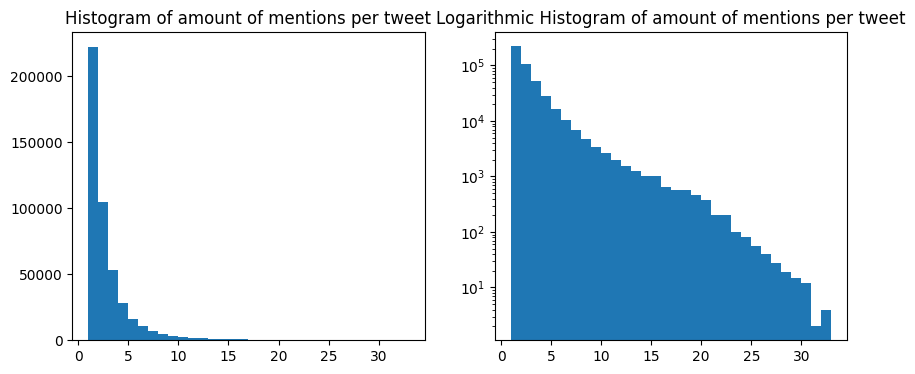

In [8]:
# View distribution of amount of hashtags per tweet
print("Extracting amount of hashtags ...")
hashtags_n = np.array(with_hashtags['Hashtags'].apply(lambda x: len(set(x))))
print("Sorting ...")
hashtags_n = sorted(hashtags_n, reverse=True)
print("Showing distribution ...")
show_distribution(hashtags_n, one_width_bins=True)

In [ ]:
# Get tweet ids for each hashtag
df = with_hashtags
array_col, id_col = "Hashtags", "Tweet Id"
dict = {}
print("Getting list of ids per hashtag ...")
i = 0
for _, row in df.iterrows():
    i += 1
    perc = (i) / len(df) * 100
    print("\r {:_}/{:_} ({:.1f}%)".format(i, len(df), perc), end='')
    for term in set(row[array_col]):
        dict[term] = dict.get(term, []) + [row[id_col]]
print("\nDone.")
print("Found {:_} unique hashtags".format(len(dict)))

In [ ]:
# Filter mentions with more than 1 associated tweet
dictf = { k: v for k, v in dict.items() if len(v) > 1 }
print("Found {:_} hashtags with more than 1 associated tweet".format(len(dictf)))

In [ ]:
# View most common mentions
keys_sorted = sorted(dict.keys(), reverse=True, key=lambda key: len(dict[key]))
for i in range(5):
    key = keys_sorted[i]
    print("key: '{}' number of tweets: {:_}".format(key, len(dict[key])))

In [ ]:
# Get number of edges that will be created
from math import comb
edges_n = sum([ comb(len(v),2) for v in list(dictf.values())[:-1] ])
print("Number of edges that will be created: {:_}".format(edges_n))

In [ ]:
# Create edges from term:array pairs in dictf
print("Creating edges ...")
edges_fn = "data/edges.txt"
with open(edges_fn, 'w') as f:
    edges_created = 0
    for done, (_, ids) in enumerate(dictf.items()):
        perc = (done+1) / len(dictf) * 100
        print("\r {:_}/{:_} ({:.3f}%) edges: {:_}".format(done+1, len(dictf), perc, edges_created), end='')
        for i in range(len(ids)):
            for j in range(i+1, len(ids)):
                line = "{} {}\n".format(ids[i], ids[j])
                f.write(line)
                edges_created += 1
        if perc > 0.01: break
print("\nDone!")

In [ ]:
# Create edges from term:array pairs in dictf and save to csv file
edges_csv_fn = "data/edgelist_ids.csv"
csvfile = open(edges_csv_fn, 'w', newline='')
csvwriter = csv.writer(csvfile)
csvwriter.writerow(["source", "target"])
print("Creating edges ...")
edges_created += 1
for done, (_, ids) in enumerate(dictf.items()):
    perc = (done+1) / len(dictf) * 100
    print("\r {:_}/{:_} ({:.3f}%) edges: {:_}".format(done+1, len(dictf), perc, edges_created), end='')
    for i in range(len(ids)):
        for j in range(i+1, len(ids)):
            csvwriter.writerow([ids[i], ids[j]])
            edges_created += 1
    #if perc > 0.1: break # uncomment for testing
csvfile.close()
print("\nDone!")